In [97]:
import cv2
import matplotlib.pyplot as plt

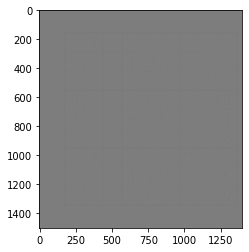

In [98]:
img = cv2.imread('sudoku.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

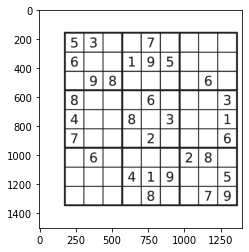

In [99]:
img = cv2.equalizeHist(img)
plt.imshow(img,cmap="gray")

In [100]:
rows, cols = img.shape

In [101]:
def search_for_top_left_point():
    for i in range(rows):
        for j in range(cols):
            if img[i][j] != 255:
                return i , j

In [102]:
def search_for_down_right_point():
    for i in range(rows-1, 0, -1):
        for j in range(cols-1, 0, -1):
            if img[i][j] != 255:
                return i , j

In [103]:
x1, y1 = search_for_top_left_point()
x2, y2 = search_for_down_right_point()
print(x2,y2)

1349 1371


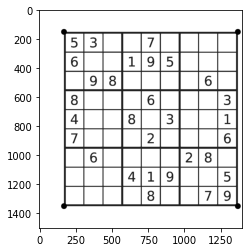

In [104]:
img = cv2.circle(img, (y1,x1), 20, (0,0,0), -1)
img = cv2.circle(img, (y2,x2), 20, (0,0,0), -1)
img = cv2.circle(img, (y2,x1), 20, (0,0,0), -1)
img = cv2.circle(img, (y1,x2), 20, (0,0,0), -1)
plt.imshow(img,cmap="gray")

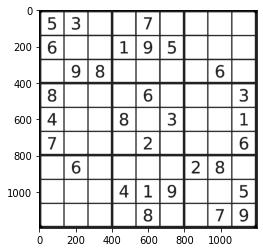

In [105]:
img_finally = img[x1:x2, y1:y2]
plt.imshow(img_finally,cmap="gray")

In [106]:
width, height = img_finally.shape
print(width, height)

1199 1199


In [133]:
cell_width = width // 9
cell_height = height // 9

133

In [122]:
def count_none_white_pixels(img):
    rows, cols = img.shape
    
    rows_10_precent = rows // 10
    cols_10_precent = cols // 10
    
    count = 0
    
    for i in range(rows_10_precent, rows-rows_10_precent):
        for j in range(cols_10_precent, rows-rows_10_precent):
            if img[i][j] != 255:
                count += 1
                
    return count

In [137]:
counter = 0
for i in range(0, width, cell_width):
    for j in range(0, height, cell_height):
        result_img = img_finally[i:i+cell_width, j:j+cell_height]
        if result_img.shape == (cell_width, cell_height):
            if count_none_white_pixels(result_img) > (cell_height*cell_width) // 100:
                cv2.imwrite(f"result/{counter}.jpg",result_img)
                counter += 1